# Mission:
## Uncover what the drivers of the error in the zestimate are.
---

# Zillow: What is driving the errors in the Zestimates?
1. In addition to continuing work on your previous project, you should incorporate clustering methodologies on this project.
1. ~~For this project you will continue working with the zillow dataset.~~
1. ~~Continue to use the 2017 properties and predictions data for single unit / single family homes.~~
1. ~~Your audience for this project is a data science team.~~
1. ~~The presentation will consist of a notebook demo of the discoveries you made and work you have done related to uncovering what the drivers of the error in the zestimate is.~~
---


# Specification
You are expected to deliver a github repository with the following contents:  
1. A notebook will be what you present and should contain plenty of markdown documentation and cleaned up code.  
1. A README that explains what the project is, how to reproduce you work, and your notes from project planning.  
1. ~~A clearly named final notebook.~~
1. ~~A Python module or modules that automate the data acquisistion and preparation process.~~
	- ~~These modules should be imported and used in your final notebook.~~
---


# Further project requirements:
1. Data Acquisition: Data is collected from the codeup cloud database with an appropriate SQL query
1. Data Prep: Column data types are appropriate for the data they contain
1. Data Prep: Missing values are investigated and handled
1. Data Prep: Outliers are investigated and handled
1. Exploration: the interaction between independent variables and the target variable is explored using visualization and statistical testing
1. Exploration: Clustering is used to explore the data. 
1. A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. 
1. At least 3 combinations of features for clustering should be tried.
1. Modeling: 
    - At least 4 different models are created and their performance is compared. 
	    - One model is the distinct combination of algorithm, 1. hyperparameters, and features.
1. Best practices on data splitting are followed
1. The final notebook has a good title and the documentation within is sufficiently explanatory and of high quality
1. Decisions and judment calls are made and explained/documented
1. All python code is of high quality
---


# Guidance
1. Create sections indicated with markdown headings in your final notebook the same way you would create seperate slides for a presentation.
1. For your MVP, do the easiest thing at each stage to move forward. 
    - Remember your MVP won't fulfill every detail of the project spec and it isn't a good use of your time to do this at first.
        - For example, for your mvp, decide not to deal with outliers and to simply drop all the null values
1. Model on scaled data, explore on unscaled
1. Clustering could be useful in several ways on this project:
    1. Do clusters produce an interesting insight, takeaway, or visualization that can be shared and communicated?
    1. With a small number of clusters, clusters could be one-hot encoded and used as a feature for modeling.
    1. Different models can be created for different clusters 
        - while conceptually simple, this involves a much more complicated python implementation, so you should probably treat this idea as a bonus
1. ~~The data acquisition here can take some time.~~
    - ~~You should probably build out caching in your python scripts to store the data locally as a csv in order to speed up future data acquisition.~~
1. ~~Sometimes your conclusion is that there is no effect or no significant difference.~~
    - ~~This is a valid conclusion in and of itself.~~
1. ~~You might wish to start working in a notebook or to split your work up into multiple notebooks.~~ 
    - ~~This is totally fine and makes sense so long as eventually you clean up and transfer the work to a final notebook and/or python scripts.~~
---

# Imports

In [1]:

from utils.imports import *
from utils.wrangle import *
from utils.explore import *
from utils.model import *

import warnings

warnings.filterwarnings('ignore')


---

# Explore

In [2]:
zillow = wrangle_zillow()

Using cached csv


In [3]:
zillow[0].info()

# zillow = [train_scaled, validate_scaled, test_scaled]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31309 entries, 0 to 31308
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   beds            31309 non-null  float64 
 1   baths           31309 non-null  float64 
 2   sqft            31309 non-null  float64 
 3   property_value  31309 non-null  float64 
 4   year            31309 non-null  category
 5   taxes           31309 non-null  float64 
 6   fips            31309 non-null  category
dtypes: category(2), float64(5)
memory usage: 1.3 MB


In [4]:
zillow = wrangle_zillow()

Using cached csv


In [5]:
targets=['taxes','property_value']

# identify targets for modeling

In [6]:
trunk = ml_data(zillow[0],zillow[1],zillow[2], targets)

# trunk contains all of the data sets we need for modeling
# 😭 no dummy variables
# trunk = [X_train, y_train, X_validate, y_validate, X_test, y_test]

In [7]:
X_train, y_train, X_validate, y_validate, X_test, y_test = trunk[0], trunk[1], trunk[2], trunk[3], trunk[4], trunk[5] 

X_train.info()

# assign variables for modeling


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31309 entries, 0 to 31308
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   beds    31309 non-null  float64 
 1   baths   31309 non-null  float64 
 2   sqft    31309 non-null  float64 
 3   year    31309 non-null  category
 4   fips    31309 non-null  category
dtypes: category(2), float64(3)
memory usage: 830.9 KB


### Does sqaure footage effect property value? 

- At first 👀 , sqaure footage seems to affect property value.

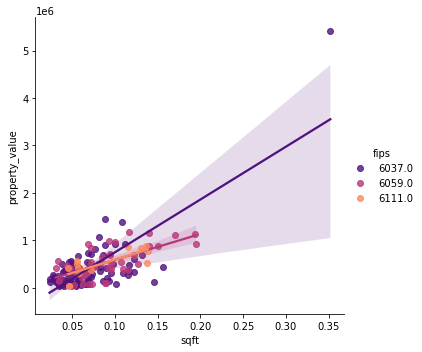

In [8]:
sns.lmplot(data=zillow[0].sample(150), x='sqft', y='property_value',palette='magma', hue='fips')

# viz

#### Use Pearson's R to test the variable for independence:

- $ H_0 = \textrm{"Variables are independent." }$  
- $ H_1 = \textrm{"Variables are NOT independent." }$

In [9]:
r,p=pearsons_r_p(zillow[0]['sqft'],zillow[0]['property_value'])

# stat

r = 0.6115
p = 0.0000

Reject H_0
moderate correlation


There is a statistically relevant correlation between square footage and property value 📈



### Does number of beds effect property value?

- At first 👀 , number of beds seems to affect property value.

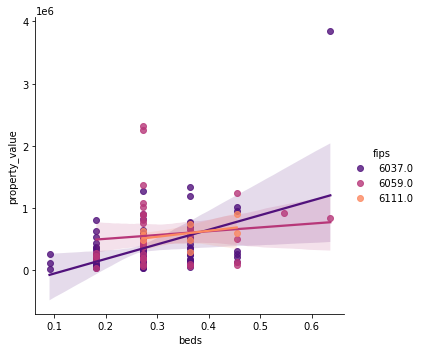

In [10]:
sns.lmplot(data=zillow[0].sample(150), x='beds', y='property_value', palette='magma', hue='fips')

# viz

#### Use Pearson's R to test the variable for independence:

- $ H_0 = \textrm{"Variables are independent." }$  
- $ H_1 = \textrm{"Variables are NOT independent." }$

In [11]:
r,p=pearsons_r_p(zillow[0]['beds'],zillow[0]['property_value'])

# stat

r = 0.2766
p = 0.0000

Reject H_0
weak correlation


There is a statistically relevant correlation between number of beds and property value 📈



### Does number of baths effect property value?

- At first 👀 , number of baths seems to affect property value.

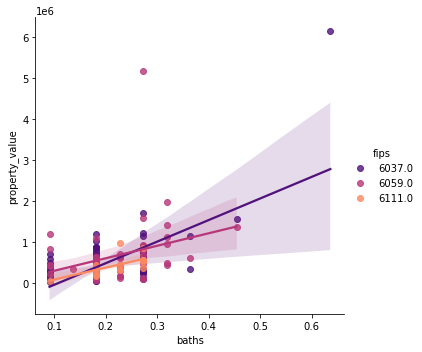

In [12]:
sns.lmplot(data=zillow[0].sample(150), x='baths', y='property_value', palette='magma', hue='fips')

# viz

#### Use Pearson's R to test the variable for independence:

- $ H_0 = \textrm{"Variables are independent." }$  
- $ H_1 = \textrm{"Variables are NOT independent." }$

In [13]:
r,p=pearsons_r_p(zillow[0]['baths'],zillow[0]['property_value'])

# stat

r = 0.5282
p = 0.0000

Reject H_0
moderate correlation


There is a statistically relevant correlation between number of baths and property value 📈



---

# Model

In [14]:
X_train, y_train, X_validate, y_validate, X_test, y_test=sml_zillow(['logerror'])

In [15]:
cols=['calculatedfinishedsquarefeet','taxvaluedollarcnt']

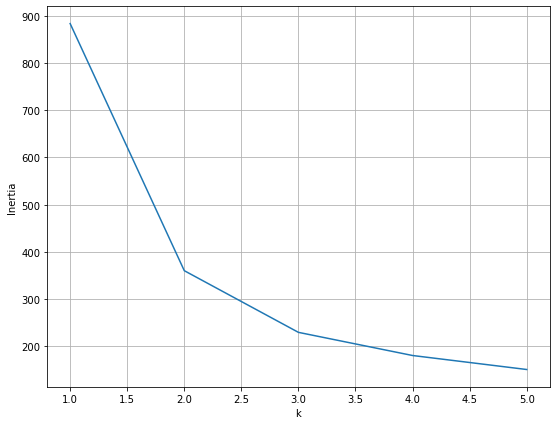

In [16]:
inertia(X_train,cols,1,6)

# kmeans object ; helps identify best k for cluster 
# "inertia" : sum of the squared distances from each point to it's assigned centroid

   calculatedfinishedsquarefeet  taxvaluedollarcnt
0                      0.653219           0.153157
1                      0.292253           0.094451


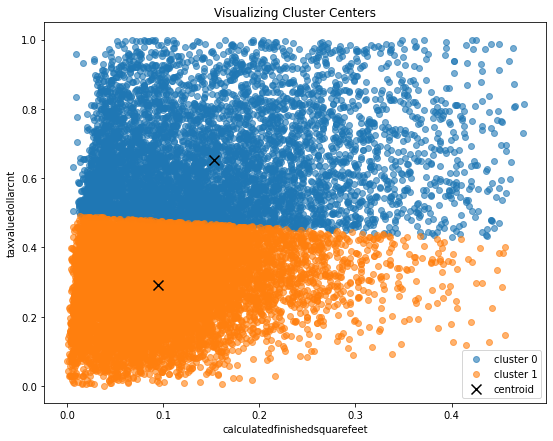

In [17]:
# call cluster function to add 'cluster' col to df with each entries kmeans cluster
X_train,centroids=cluster(X_train,'calculatedfinishedsquarefeet','taxvaluedollarcnt',2)

MSE OLS sklearn:  6.63e-04 

y_hat_ols superior 

MSE for Lasso + Lars
Training/In-Sample:  6.63e-04 

yhat_baseline superior 

MSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  6.63e-04 

yhat_baseline superior 

MSE for Polynomial Model, degrees=2
Training/In-Sample:  6.63e-04 

yhat_baseline superior 

   calculatedfinishedsquarefeet  taxvaluedollarcnt
0                      0.281678           0.092722
1                      0.647843           0.180361
                     mse
mse_baseline    0.000663
mse_ols         0.000663
mse_lars_train  0.000663
mse_glm_train   0.000663
mse_lmp_train   0.000663 

                   mse
mse_base_val  0.000913
mse_ols_val   0.000914
mse_lars_val  0.000914
mse_glm_val   0.000914
mse_lmp_val   0.000914 

logerror          0.425473
yhat_base_prop    0.425473
yhat_prop_ols     0.425473
yhat_prop_lars    0.425473
yhat_prop_glm     0.425473
yhat_prop_lmp     0.425473
dtype: float64 

logerror         0.426304
yhat_val_base    0.426304
y

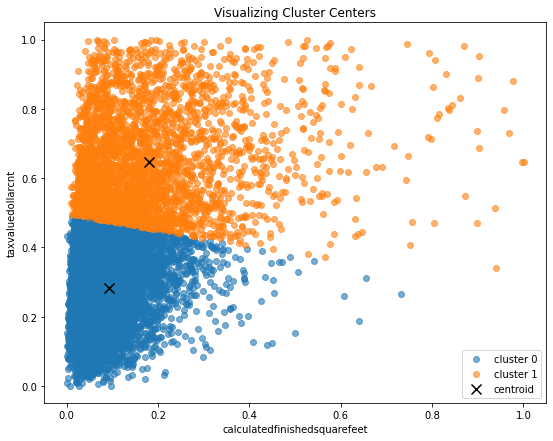

In [18]:

y_train['yhat_base_prop']=y_train.logerror.mean()


# evaluate: rmse
mse_baseline = mean_squared_error(y_train.logerror, y_train.yhat_base_prop)

model = LinearRegression().fit(X_train[['cluster']],y_train['logerror'])

y_train['yhat_prop_ols'] = model.predict(X_train[['cluster']])

mse_ols = mean_squared_error(y_train.logerror, y_train.yhat_prop_ols)

print("MSE OLS sklearn: ","{:.2e}".format(mse_ols),"\n") 

if mse_ols-mse_baseline<0:
	print("y_hat_ols superior","\n")
else:
	print("yhat_baseline superior","\n")

lars = LassoLars(alpha=1.0)

# create the model object

lars.fit(X_train[['cluster']], y_train.logerror)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series!

y_train['yhat_prop_lars'] = lars.predict(X_train[['cluster']])

# predict train

# evaluate: rmse
mse_lars_train = mean_squared_error(y_train.logerror, y_train.yhat_prop_lars)


print("MSE for Lasso + Lars\nTraining/In-Sample: ","{:.2e}".format(mse_lars_train),"\n")

if mse_lars_train-mse_baseline<0:
	print("y_hat_lars superior","\n")
else:
	print("yhat_baseline superior","\n")


# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train[['cluster']], y_train.logerror)

# predict train
y_train['yhat_prop_glm'] = glm.predict(X_train[['cluster']])

# evaluate: mse
mse_glm_train = mean_squared_error(y_train.logerror, y_train.yhat_prop_glm)

print("MSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ","{:.2e}".format( mse_glm_train),"\n")

if mse_glm_train-mse_baseline<0:
	print("y_hat superior","\n")
else:
	print("yhat_baseline superior","\n")

# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train[['cluster']])

# create the model object
lmp = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lmp.fit(X_train_degree2,y_train.logerror)

# predict train
y_train['yhat_prop_lmp'] = lmp.predict(X_train_degree2)

# evaluate: rmse
mse_lmp_train = mean_squared_error(y_train.logerror, y_train.yhat_prop_lmp)

print("MSE for Polynomial Model, degrees=2\nTraining/In-Sample: ","{:.2e}".format( mse_lmp_train),"\n")

if mse_glm_train-mse_baseline<0:
	print("y_hat superior","\n")
else:
	print("yhat_baseline superior","\n")
	
mses=pd.DataFrame([mse_baseline,
mse_ols,
mse_lars_train,
mse_glm_train,
mse_lmp_train],
columns=['mse'],
index= ['mse_baseline',
'mse_ols',
'mse_lars_train',
'mse_glm_train',
'mse_lmp_train'])

X_validate,centroids=cluster(X_validate,'calculatedfinishedsquarefeet','taxvaluedollarcnt',2)

# transform X_validate_scaled 
X_validate_degree2 = pf.transform(X_validate[['cluster']])

y_validate['yhat_val_base'] = y_validate.logerror.mean()

y_validate['yhat_val_ols'] = model.predict(X_validate[['cluster']])

y_validate['yhat_val_lars'] = lars.predict(X_validate[['cluster']])

y_validate['yhat_val_glm'] = glm.predict(X_validate[['cluster']])

y_validate['yhat_val_lmp'] = lmp.predict(X_validate_degree2)



mse_base_val = mean_squared_error(y_validate.logerror, y_validate.yhat_val_base)

mse_ols_val = mean_squared_error(y_validate.logerror, y_validate.yhat_val_ols)

mse_lars_val = mean_squared_error(y_validate.logerror, y_validate.yhat_val_lars)

mse_glm_val = mean_squared_error(y_validate.logerror, y_validate.yhat_val_glm)

mse_lmp_val = mean_squared_error(y_validate.logerror, y_validate.yhat_val_lmp)

mse_val=[mse_base_val,mse_ols_val,mse_lars_val,mse_glm_val,mse_lmp_val]
mse_val=pd.DataFrame(mse_val,index=['mse_base_val','mse_ols_val','mse_lars_val','mse_glm_val','mse_lmp_val' ],columns=['mse'])

print(mses,"\n")
print(mse_val,"\n")
print(y_train.mean(),"\n")
print(y_validate.mean(),"\n")

---

### Test

   calculatedfinishedsquarefeet  taxvaluedollarcnt
0                      0.281766           0.091307
1                      0.652748           0.183566


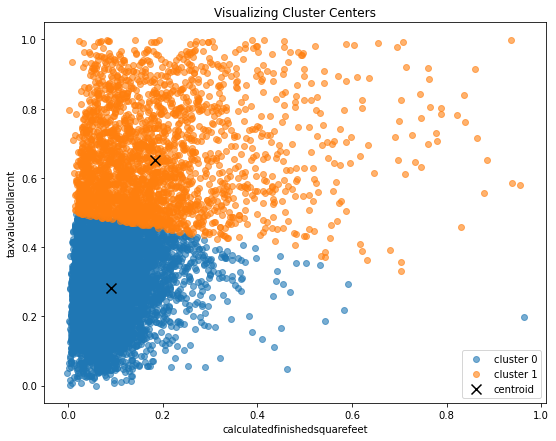

In [19]:
X_test,centroids=cluster(X_test,'calculatedfinishedsquarefeet','taxvaluedollarcnt',2)

In [20]:
X_test_degree2 = pf.transform(X_test[['cluster']])

In [21]:
model = LinearRegression().fit(X_test[['cluster']],y_test['logerror'])

y_test['yhat_test_ols'] = model.predict(X_test[['cluster']])

mse_ols = mean_squared_error(y_test.logerror, y_test.yhat_test_ols)

print("MSE OLS sklearn: ","{:.2e}".format(mse_ols)) 

y_test['test_baseline'] = y_test['logerror'].median()

mse_test_baseline=mean_squared_error(y_test.logerror, y_test.test_baseline)

if mse_ols-mse_test_baseline<0:
	print("y_hat superior")
else:
	print("yhat_baseline superior")


MSE OLS sklearn:  8.08e-04
y_hat superior


---

# Conclusion
1. "Square footage" and "tax value" don't seem to be the biggest drivers of logerror 
1. Clustering can be useful for determining features but may require more than multivariate analysis to prove useful for making predictions.

With more time I would:
1. Try recursive feature elimination on the regression model.

---
